[https://ara.jri.ac.ir/](https://ara.jri.ac.ir/)

In [1]:
!pip install hazm

In [2]:
import numpy as np
import pandas as pd
import hazm
from IPython.display import display, HTML

In [3]:
!wget -O case.csv "https://drive.usercontent.google.com/download?id=1H6361b8siR46jdSAYGNytrsstH2DMWcT&export=download&confirm=t&uuid=73828284-1c7b-4c0c-b29a-bbd2e65c74ae"


--2024-08-09 15:37:04--  https://drive.usercontent.google.com/download?id=1H6361b8siR46jdSAYGNytrsstH2DMWcT&export=download&confirm=t&uuid=73828284-1c7b-4c0c-b29a-bbd2e65c74ae
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.97.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156742346 (149M) [application/octet-stream]
Saving to: ‘case.csv’

case.csv            100%[===================>] 149.48M   166MB/s    in 0.9s    

2024-08-09 15:37:06 (166 MB/s) - ‘case.csv’ saved [156742346/156742346]



In [4]:
import pandas as pd

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 2000)

In [7]:
from hazm import Normalizer

df = pd.read_csv('case.csv')
df['text'] = df['text'].str.lstrip('\n. ')

normalizer = Normalizer()

df['text'] = df['text'].apply(normalizer.normalize)

df['text'] = df['text'] + '[end]'

pattern = r'(?=(?<![\d۱-۹])(?<!ماده))(خانم|آقایان|خانمها|خانم ها|اقا|اقایان|فرزند|بنام|آقای)*\s+(([آ-ی]|الف)\.\s*)+'

df['rm_names'] = df['text'].str.replace(pattern, ' ', regex=True)

pattern = r'\.\s*?[آ-ی\s‌]+(-\s*[آ-ی\s‌]+)*?\s*[\.\s]+\[end]'

df['rm_names'] = df['rm_names'].str.replace(pattern, ' ', regex=True)

In [10]:
def printfa(text: str):
    font_url = "https://cdn.fontcdn.ir/Font/Persian/Vazir/Vazir.eot"
    html = f'''
    <style>
    @font-face {{
        font-family: 'Vazir';
        src: url('{font_url}');
    }}
    .persian-text {{
        font-family: 'Vazir', sans-serif;
        direction: rtl;
        text-align: right;
    }}
    </style>
    <div class="persian-text">{text}</div>
    '''
    display(HTML(html))


In [11]:
idd = 259

printfa(df.loc[idd, 'text'])
print()
printfa(df.loc[idd, 'rm_names'])

print(len(df.loc[idd, 'text']))
print(len(df.loc[idd, 'rm_names']))

1648
1535


In [76]:
from hazm import Normalizer


normalizer = Normalizer()

df['rm_names'] = df['rm_names'].apply(normalizer.normalize)


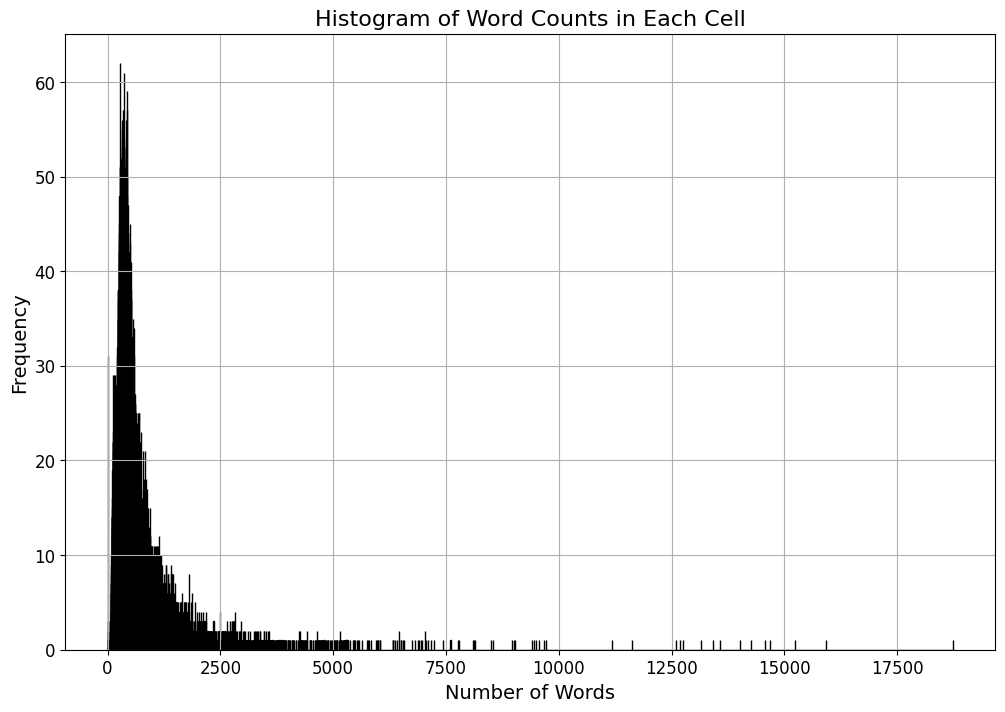

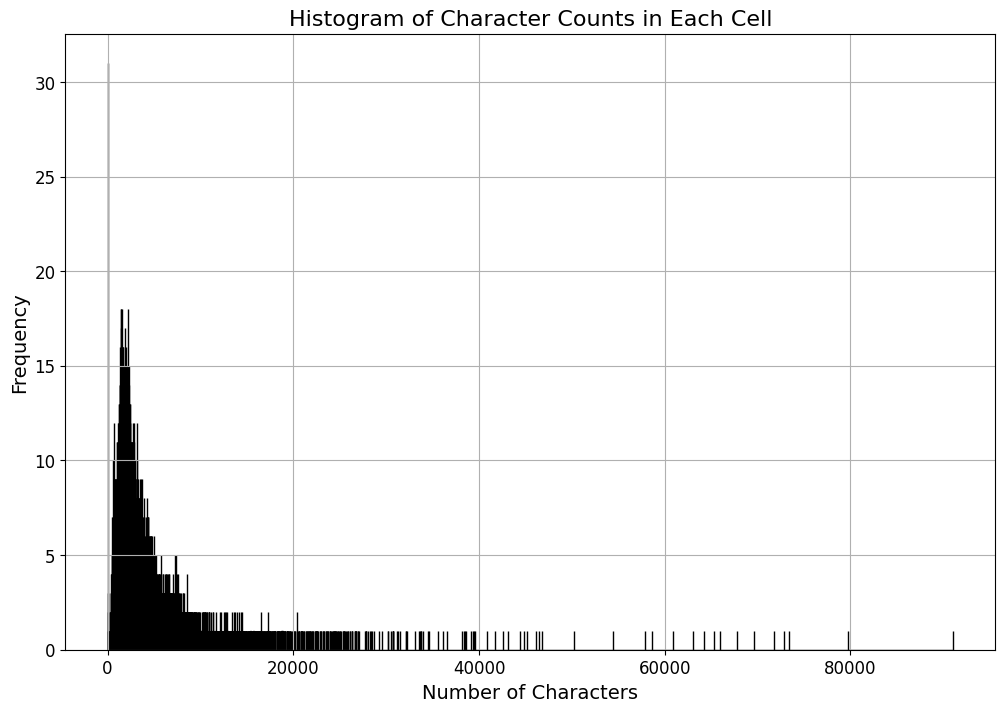

In [ ]:
import matplotlib.pyplot as plt

def count_words(text):
    return len(text.split())

def count_chars(text):
    return len(text)

df['word_count'] = df['rm_names'].apply(count_words)

df['char_count'] = df['rm_names'].apply(count_chars)


plt.figure(figsize=(12, 8))
plt.hist(df['word_count'], bins=range(df['word_count'].min(), df['word_count'].max() + 2), edgecolor='black')
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Word Counts in Each Cell', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
plt.hist(df['char_count'], bins=range(df['char_count'].min(), df['char_count'].max() + 2), edgecolor='black')
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Character Counts in Each Cell', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
len(df[df['word_count']>2500])

622

In [ ]:
len(df[df['word_count']<50])

40

In [ ]:
df[(df['word_count']<50) & (df['rm_names'] != '\n. \n. \n')].head(30)[['rm_names', 'number']]

,rm_names,number
3004,\n. رأی دادگاه تجدیدنظر استان. پرونده کلاسه *تصمیم نهایی شماره *. \nتجدیدنظرخواه: اقای به نشانی *. \nتجدیدنظرخوانده: سازمان *به نشانی *. \nتجدیدنظر خواسته: تغییر جنسیت. \nاعاده جهت معرفی به هیات ۵ نفره سازمان *\n. \n. \n,NaN
3650,\n. رأی دادگاه تجدیدنظر استان. \n. \n. \n,9509987736300080
3672,\n. رأی دادگاه تجدیدنظر استان. \n. \n. \n,1.4009192000474277E+17
9434,\n. رأی شعبه دیوان عدالت اداری. دادرس شعبه ۱ دیوان عدالت اداری مستشار شعبه. \nمؤمنی مولابیگی\n. \n. \n,9209970900100011
9882,\n. رأی شعبه دیوان عدالت اداری. نظر به اینکه بنگاه تعاون و حرفه‌آموزی صنایع زندانیان در زمره واحدهای دولتی تلقی نمی‌گردد، لذا اجابت خواسته شاکی جواز قانونی ندارد و رد می‌گردد. رأی صادر شده قطعی است.. \nرئیس شعبه ۲۵ دیوان عدالت اداری مستشار شعبه. \nنوروزی امینی\n. \n. \n,9209970902500753
18488,\n. رأی دادگاه تجدیدنظر استان. \n. \n. \n,9409970223201252
20461,\n. رأی خلاصه جریان پرونده. رأی شعبه دیوان عالی کشور. \n. \n. \n,9409970909100226
20524,\n. رأی خلاصه جریان پرونده. رأی شعبه دیوان عالی کشور. \n. \n. \n,9409970906800538
20956,\n. رأی دادگاه بدوی. رأی دادگاه تجدیدنظر استان. \n. \n. \n,9409970220100819


In [ ]:
df[(df['word_count']<50) & (df['rm_names'] == '\n. \n. \n')].head(5)[['rm_names', 'number']]

,rm_names,number
2394,\n. \n. \n,9109970910600648
2408,\n. \n. \n,9109970910500748
2423,\n. \n. \n,9109970908400835
2627,\n. \n. \n,9109970910600739
2632,\n. \n. \n,9109970908800788


In [ ]:
printfa(df[df['text'].str.contains('دفاع و انجام دادرسی منصفانه دعوی مطروحه')]['rm_names'])

In [ ]:
printfa(df[df['text'].str.contains('دفاع و انجام دادرسی منصفانه دعوی مطروحه')]['text'])

In [ ]:
df['text'].isnull().sum()

0

In [ ]:
df.loc[250:252, ['text','rm_names']]

,text,rm_names
250,\n. رأی دادگاه بدوی. در خصوص دادخواست تقدیمی خواهان آقای ص. م. غ. فرزند م. بطرفیت خانم ف. ر. ن. فرزند الف. بخواسته تجویز ازدواج مجدد، نظر به اینکه خواهان جهت اثبات ادعای خود به دادنامه شماره ۹۲۰۹۲۷ مورخ ۱۳۹۲ / ۵ / ۲۹ اصداری از شعبه ۲۸۷ دادگاه عمومی حقوقی (خانواده) تهران استناد نموده و در ما نحن فیه طبق گواهی صادره از آن شعبه محترم مورخ ۱۳۹۴ / ۷ / ۲۶، خواهان در تاریخ ۱۳۹۴ / ۷ / ۲۲ تقاضای صدور اجرائیه را نموده است در حالیکه دادنامه فوق زمانی می‌تواند در اثبات ادعای خواهان باشد که اجرائیه در آن خصوص صادر و زوجه با وصف ابلاغ اجرائیه آمادگی خویش را جهت تمکین از زوج با وصف فراهم بودن شرایط و مسکن مناسب با اثاث البیت اعلام نکرده باشد و با قطع نظر از عدم ارائه دلیل از سوی وی مبنی بر تمکن مالی جهت اداره دو زندگی لذا دادگاه دعوی خواهان را وارد ندانسته مستندا به ماده ۱۲۵۷ قانون مدنی حکم بر بطلان دعوی خواهان صادر و اعلام می‌دارد رأی صادره حضوری و ظرف بیست روز پس از ابلاغ قابل تجدیدنظر خواهی در محاکم محترم تجدیدنظر استان تهران می‌باشد. \n. \nدادرس شعبه ۲۸۶ دادگاه عمومی حقوقی (خانواده) تهران- صمد محمدی. رأی دادگاه تجدیدنظر استان. در خصوص تجدیدنظرخواهی آقای ص. م. غ. به طرفیت خانم ف. ر. ن. از دادنامه شماره ۹۴۱۳۹۰ - ۹۴ / ۸ / ۲۷ صادره از شعبه محترم ۲۸۶ دادگاه خانواده تهران که به موجب آن در مورد دعوی ازدواج مجدد تجدیدنظرخواه حکم به بطلان آن صادر گردیده است بشرح توضیحات داده‌شده در دادنامه موصوف صادر گردیده است با عنایت به اوراق و محتویات پرونده و اینکه گواهی مبنی بر استنکاف تجدیدنظرخوانده از اجرای حکم تمکین ارائه نشده است وارد نمی‌باشد زیرا رای بر اساس مقررات وموازین قانونی صادر شده و ایرادی از حیث ماهوی یا شکلی به آن وارد نیست و استدلال محکمه محترم بدوی و نیز مستندات آن صحیح می‌باشد و تجدیدنظرخواه دلیلی که موجبات نقض و یا بی اعتباری دادنامه را فراهم نماید ارائه ننموده لذا بنا به مراتب دادگاه مستندا به قسمت اخیر ماده ۳۵۸ قانون آیین دادرسی دادگاه‌های عمومی و انقلاب در امور مدنی ۲۱ / ۱ / ۷۹ ضمن رد اعتراض معترض دادنامه معترض عنه را نتیجتا تایید می‌نماید رای دادگاه به موجب ماده ۳۶۵ قانون فوق‌الذکر قطعی است\n. \nشعبه ۲۶ دادگاه تجدیدنظر استان تهران - رئیس و مستشار\n. \nقربانعلی احمدی - ...,\n. رأی دادگاه بدوی. در خصوص دادخواست تقدیمی خواهان بطرفیت بخواسته تجویز ازدواج مجدد، نظر به اینکه خواهان جهت اثبات ادعای خود به دادنامه شماره ۹۲۰۹۲۷ مورخ ۱۳۹۲ / ۵ / ۲۹ اصداری از شعبه ۲۸۷ دادگاه عمومی حقوقی (خانواده) تهران استناد نموده و در ما نحن فیه طبق گواهی صادره از آن شعبه محترم مورخ ۱۳۹۴ / ۷ / ۲۶، خواهان در تاریخ ۱۳۹۴ / ۷ / ۲۲ تقاضای صدور اجرائیه را نموده است در حالیکه دادنامه فوق زمانی می‌تواند در اثبات ادعای خواهان باشد که اجرائیه در آن خصوص صادر و زوجه با وصف ابلاغ اجرائیه آمادگی خویش را جهت تمکین از زوج با وصف فراهم بودن شرایط و مسکن مناسب با اثاث البیت اعلام نکرده باشد و با قطع نظر از عدم ارائه دلیل از سوی وی مبنی بر تمکن مالی جهت اداره دو زندگی لذا دادگاه دعوی خواهان را وارد ندانسته مستندا به ماده ۱۲۵۷ قانون مدنی حکم بر بطلان دعوی خواهان صادر و اعلام می‌دارد رأی صادره حضوری و ظرف بیست روز پس از ابلاغ قابل تجدیدنظر خواهی در محاکم محترم تجدیدنظر استان تهران می‌باشد. \n. \nدادرس شعبه ۲۸۶ دادگاه عمومی حقوقی (خانواده) تهران- صمد محمدی. رأی دادگاه تجدیدنظر استان. در خصوص تجدیدنظرخواهی به طرفیت از دادنامه شماره ۹۴۱۳۹۰ - ۹۴ / ۸ / ۲۷ صادره از شعبه محترم ۲۸۶ دادگاه خانواده تهران که به موجب آن در مورد دعوی ازدواج مجدد تجدیدنظرخواه حکم به بطلان آن صادر گردیده است بشرح توضیحات داده‌شده در دادنامه موصوف صادر گردیده است با عنایت به اوراق و محتویات پرونده و اینکه گواهی مبنی بر استنکاف تجدیدنظرخوانده از اجرای حکم تمکین ارائه نشده است وارد نمی‌باشد زیرا رای بر اساس مقررات وموازین قانونی صادر شده و ایرادی از حیث ماهوی یا شکلی به آن وارد نیست و استدلال محکمه محترم بدوی و نیز مستندات آن صحیح می‌باشد و تجدیدنظرخواه دلیلی که موجبات نقض و یا بی اعتباری دادنامه را فراهم نماید ارائه ننموده لذا بنا به مراتب دادگاه مستندا به قسمت اخیر ماده ۳۵۸ قانون آیین دادرسی دادگاه‌های عمومی و انقلاب در امور مدنی ۲۱ / ۱ / ۷۹ ضمن رد اعتراض معترض دادنامه معترض عنه را نتیجتا تایید می‌نماید رای دادگاه به موجب ماده ۳۶۵ قانون فوق‌الذکر قطعی است\n. \nشعبه ۲۶ دادگاه تجدیدنظر استان تهران - رئیس و مستشار\n. \nقربانعلی احمدی - قربانعلی میرزائی\n. \n. \n
251,\n. رأی دادگاه بدوی. در خصوص د

In [23]:
import re

def clean_numbers(text):
    pattern = r'(تاریخ\s*:\s*[\d\s/]+)|' \
              r'(در\s*تاریخ\s*[\d\s/]+)|' \
              r'(شماره\s*پرونده\s*:\s*\d+)|' \
              r'(شماره\s*دادنامه\s*:\s*\d+)|' \
              r'(شماره\s*[\d\s/-]+)|' \
              r'(مورخ\s*[\d\s/]+)|' \
              r'(مورخه\s*[\d\s/]+)|' \
              r'(قرارداد\s*تا\s*[\d\s/]+)|' \
              r'(کلاسه\s*[\d\s/]+)|' \
              r'(دادنامه\s*غیابی\s*[\d\s/-]+)|' \
              r'(دادنامه\s*[\d\s/-]+)|' \
              r'(از\s*[\d\s/]+\s*لغایت\s*[\d\s/]+)|' \
              r'(این\s*تایید\s*-\s*[\d\s/-]+)|' \
              r'(طبق\s*قرارداد\s*[\d\s/,]+)|' \
              r'(و\s*قرارداد)|' \
              r'(ازتاریخ\s*[\d\s/]+\s*الی\s*[\d\s/]+)|' \
              r'(از\s*[\d\s/]+\s*الی\s*[\d\s/]+)|' \
              r'(کلاسه‌های\s*[\d\s/]+)|' \
              r'(پرونده\s*-\s*[\d\s/]+)|' \
              r'(موصوف\s*[\d\s/]+)|' \
              r'(شماره\s*…\s*\d+)|' \
              r'(…\s*\d+\s*-\s*[\d\s/]+)|' \
              r'(از\s*تاریخ\s*[\d\s/]+)|' \
              r'(به\s*تاریخ\s*[\d\s/]+)|' \
              r'(شعبه\s*\d+)|' \
              r'(شماره\s*[\d\s-]+\s*-\s*[\d\s/]+)|' \
              r'(از\s*مورخ\s*[\d\s/]+\s*الی\s*[\d\s/]+)|'\
              r'(لایحه\s*شماره\s*[\d\s-]+\s*-\s*[\d\s/]+)|'\
              r'(شماره\s*\d+)|'\
              r'([\d۰-۹]{2,4}\s*\/\s*[\d۰-۹]{1,2}\s*\/\s*[\d۰-۹]{1,2})'

            #   r'(وتایید\s*-\s*[\d\s/]+)'



    text_cleaned = re.sub(pattern, '', text)

    text_cleaned = re.sub(r'\s+', ' ', text_cleaned).strip()

    return text_cleaned


In [24]:
df['rm_d_n'] = df['rm_names'].apply(clean_numbers)

In [25]:
idd = 951

printfa(df.loc[idd, 'text'])
print()
printfa(df.loc[idd, 'rm_d_n'])

print(len(df.loc[idd, 'text']))
print(len(df.loc[idd, 'rm_d_n']))

2202
1883


In [26]:
normalizer = Normalizer()

df['rm_d_n'] = df['rm_d_n'].apply(normalizer.normalize)

In [29]:
df.to_csv('processed_cases.csv', index=False)

In [30]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [31]:
!cp processed_cases.csv '/content/drive/My Drive/processed_cases.csv'

In [27]:
df[['text', 'rm_names', 'rm_d_n']].head()

,text,rm_names,rm_d_n
0,رأی خلاصه جریان پرونده. شماره پرونده: ۹۱۰۹۹۸۰۳۰۰۹۰۰۶۰۲ شماره دادنامه: ۹۴۰۹۹۷۰۹۰۸۳۰۰۸۳۷ تاریخ: ۱۳۹۴ / ۱۲ / ۱۷. \nخلاصه جریان پرونده. \nدرتاریخ ۹۱ / ۰۸ / ۰۹ آقای م. ت. ز. باوکالت آقای ح. ع. دادخواستی بطرفیت آقای ع. الف. ی. م. بخواسته ۱ - اعلام وتنفیذ اقاله قرارداد مورخ ۱۳۹۰ / ۱۲ / ۰۵ ۲ - مطالبه وجه التزام قرارداد به مبلغ ۱۱۰ / ۰۰۰ / ۰۰۰ ریال معادل یازده میلیون تومان از ۹۱ / ۰۱ / ۲۵ لغایت ۹۱ / ۰۵ / ۱۵ بند ۲۴ قرارداد ۳ - استرداد ومطالبه وجه اضافی ۳۴ / ۵۴۰ / ۰۰۰ ریال معادل سه میلیون و چهارصدوپنجاه و چهار هزار تومان ۴ - استرداد دوفقره چک به شماره‌های ۷۶۸۲۸۴ و ۷۶۸۲۸۵ صادرات ابوذر - جمعا به مبلغ هفتصد هزار تومان ۵ - مطالبه مابه‌التفاوت گرانی مصالح ساختمان فعلا مقوم به سه میلیون وده هزار ریال بااحتساب هزینه‌های دادرسی وحق الوکاله وکیل تقدیم دادگستری یزد نموده ووکیل خواهان توضیح داده است خوانده طبق قرارداد ۹۰ / ۱۲ / ۰۵ متعهد به ساخت‌وساز ساختمان مسکونی موکل واقع در مجد آباد شهرک گلستان گردیده که متأسفانه نظر به بند‌های قرارداد قید شده نه‌تنها آشنائی کامل به کار نداشته بلکه از مصا لحی که درقرار داد قید گردید استفاده ننموده است لیکن باتوجه به پرداخت مبلغ سیزده میلیون وهفتصد وپنجاه هزارتومان طی چکهای صادره، مطابق بانظر کارشناس تاکنون میزان کار انجام‌شده با مصالح به کار رفته مبلغ ۱۰۲ / ۹۶۰ / ۰۰۰ ریال بر آورد گردیده است که مابه‌التفاوت پرداختی موکل به خوانده ۳۴ / ۵۴۰ / ۰۰۰ ریال است لذا باتوجه به تعطیلی کار از ناحیه پیمانکار (خوانده) واینکه ازتاریخ ۹۱ / ۰۲ / ۲۵ الی ۹۱ / ۰۵ / ۱۵ مطابق تأمین دلیل صورت گرفته ونظریه کارشناس فعالیت باقیمانده زیر زمین انجام‌نشده است وپیمانکار بخواسته خود از ادامه کار خوداری نموده است متأسفانه موکل رامواجه با سرگردانی وضرر وزیان ناشی از گرانی و تورم مصالح ساختمانی نموده است بدین منظور موکل چکهای قرارداد را از پیمانکار مطالبه که نامبرده به وی مسترد نموده است ومطابق با ماده ۲۸۴ قانون مدنی قرارداد مورخ ۹۰ / ۱۲ / ۲۵ اقاله شده است فلذا اولا تقاضای اعلام وتنفیذ اقاله را دارم ثانیا مطالبه وجه التزام مطابق با بند ۲۴ قرارداد (روزانه یکصد هزار تومان) جمعا یازده میلیون تومان از ۹۱ / ۰۱ / ۲۵ الی ۹۱ / ۰۵ / ۱۵ مورد تقاضا است ثالثا استرداد دو فقره چک به شماره‌های ۷۶...,رأی خلاصه جریان پرونده. شماره پرونده: ۹۱۰۹۹۸۰۳۰۰۹۰۰۶۰۲ شماره دادنامه: ۹۴۰۹۹۷۰۹۰۸۳۰۰۸۳۷ تاریخ: ۱۳۹۴ / ۱۲ / ۱۷. \nخلاصه جریان پرونده. \nدرتاریخ ۹۱ / ۰۸ / ۰۹ باوکالت دادخواستی بطرفیت بخواسته ۱ - اعلام وتنفیذ اقاله قرارداد مورخ ۱۳۹۰ / ۱۲ / ۰۵ ۲ - مطالبه وجه التزام قرارداد به مبلغ ۱۱۰ / ۰۰۰ / ۰۰۰ ریال معادل یازده میلیون تومان از ۹۱ / ۰۱ / ۲۵ لغایت ۹۱ / ۰۵ / ۱۵ بند ۲۴ قرارداد ۳ - استرداد ومطالبه وجه اضافی ۳۴ / ۵۴۰ / ۰۰۰ ریال معادل سه میلیون و چهارصدوپنجاه و چهار هزار تومان ۴ - استرداد دوفقره چک به شماره‌های ۷۶۸۲۸۴ و ۷۶۸۲۸۵ صادرات ابوذر - جمعا به مبلغ هفتصد هزار تومان ۵ - مطالبه مابه‌التفاوت گرانی مصالح ساختمان فعلا مقوم به سه میلیون وده هزار ریال بااحتساب هزینه‌های دادرسی وحق الوکاله وکیل تقدیم دادگستری یزد نموده ووکیل خواهان توضیح داده است خوانده طبق قرارداد ۹۰ / ۱۲ / ۰۵ متعهد به ساخت‌وساز ساختمان مسکونی موکل واقع در مجد آباد شهرک گلستان گردیده که متأسفانه نظر به بند‌های قرارداد قید شده نه‌تنها آشنائی کامل به کار نداشته بلکه از مصا لحی که درقرار داد قید گردید استفاده ننموده است لیکن باتوجه به پرداخت مبلغ سیزده میلیون وهفتصد وپنجاه هزارتومان طی چکهای صادره، مطابق بانظر کارشناس تاکنون میزان کار انجام‌شده با مصالح به کار رفته مبلغ ۱۰۲ / ۹۶۰ / ۰۰۰ ریال بر آورد گردیده است که مابه‌التفاوت پرداختی موکل به خوانده ۳۴ / ۵۴۰ / ۰۰۰ ریال است لذا باتوجه به تعطیلی کار از ناحیه پیمانکار (خوانده) واینکه ازتاریخ ۹۱ / ۰۲ / ۲۵ الی ۹۱ / ۰۵ / ۱۵ مطابق تأمین دلیل صورت گرفته ونظریه کارشناس فعالیت باقیمانده زیر زمین انجام‌نشده است وپیمانکار بخواسته خود از ادامه کار خوداری نموده است متأسفانه موکل رامواجه با سرگردانی وضرر وزیان ناشی از گرانی و تورم مصالح ساختمانی نموده است بدین منظور موکل چکهای قرارداد را از پیمانکار مطالبه که نامبرده به وی مسترد نموده است ومطابق با ماده ۲۸۴ قانون مدنی قرارداد مورخ ۹۰ / ۱۲ / ۲۵ اقاله شده است فلذا اولا تقاضای اعلام وتنفیذ اقاله را دارم ثانیا مطالبه وجه التزام مطابق با بند ۲۴ قرارداد (روزانه یکصد هزار تومان) جمعا یازده میلیون تومان از ۹۱ / ۰۱ / ۲۵ الی ۹۱ / ۰۵ / ۱۵ مورد تقاضا است ثالثا استرداد دو فقره چک به شماره‌های ۷۶۸۲۸۴ و ۷۶۸۲۸۵ مورد استدع